<a href="https://colab.research.google.com/github/nidhiann24/Devfolio_Tamasha/blob/main/cyberbullying_all%20models%20with%20logistic%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CyberBullying Detection model


Importing packages


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading the data


In [78]:
import chardet
with open('cyberbullying_tweets.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1254',
 'confidence': 0.4790047647561455,
 'language': 'Turkish'}

In [82]:
data= pd.read_csv('cyberbullying_tweets.csv',encoding='latin-1')
print(data.shape)
data.head()

(47691, 2)


,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


Preprocessing


In [83]:
c=data.isnull().sum()
c

tweet_text            0
cyberbullying_type    0
dtype: int64

In [84]:
data.shape

(47691, 2)

In [85]:
data.describe()

,tweet_text,cyberbullying_type
count,47691,47691
unique,46006,6
top,#NAME?,religion
freq,11,7998


In [86]:
data['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [104]:
data['length'] = data['tweet_text'].apply(len)
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",0
1,Why is #aussietv so white? #MKR #theblock #ImA...,0
2,@XochitlSuckkks a classy whore? Or more red ve...,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0
4,@RudhoeEnglish This is an ISIS account pretend...,0


In [105]:
# Preprocess text data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [106]:
# Apply preprocessing to the text column
data['tweet_text'] = data['tweet_text'].apply(preprocess_text)

In [107]:
df.loc[:,'cyberbullying_type'] = df.cyberbullying_type.map({'not_cyberbullying':0, 'gender':1, 'religion':2, 'other_cyberbullying':3,'age':4, 'ethnicity':5})
print(df.shape)
df.head()


(47691, 2)


,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",NaN
1,Why is #aussietv so white? #MKR #theblock #ImA...,NaN
2,@XochitlSuckkks a classy whore? Or more red ve...,NaN
3,"@Jason_Gio meh. :P thanks for the heads up, b...",NaN
4,@RudhoeEnglish This is an ISIS account pretend...,NaN


Cleaning the data


In [108]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [109]:

# Function to clean the text data
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|\#\w+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join the cleaned tokens back into a single string
    cleaned_text = ' '.join(tokens)
    return cleaned_text


In [110]:
import nltk

# Download the "punkt" resource
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [111]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [112]:
# Clean the text data
data['tweet_text'] = data['tweet_text'].apply(clean_text)

data.head()

,tweet_text,cyberbullying_type,length
0,word katandandre food crapilicious mkr,not_cyberbullying,38
1,aussietv white mkr theblock imacelebrityau tod...,not_cyberbullying,91
2,xochitlsuckkks classy whore red velvet cupcake,not_cyberbullying,46
3,jasongio meh p thanks head concerned another a...,not_cyberbullying,63
4,rudhoeenglish isi account pretending kurdish a...,not_cyberbullying,67


In [120]:
data.isnull().sum()

tweet_text            0
cyberbullying_type    0
length                0
dtype: int64

Data Visualization


<Axes: ylabel='Frequency'>

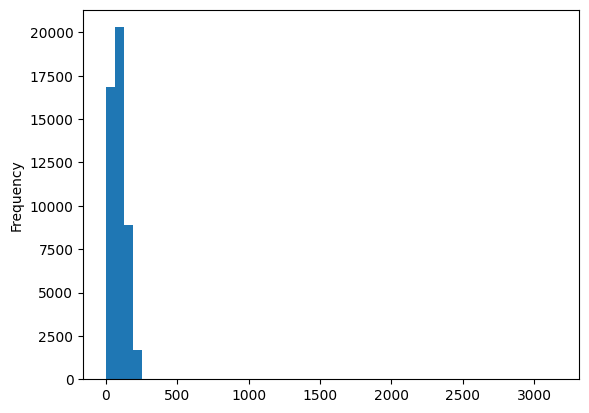

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
data['length'].plot(bins=50, kind='hist')

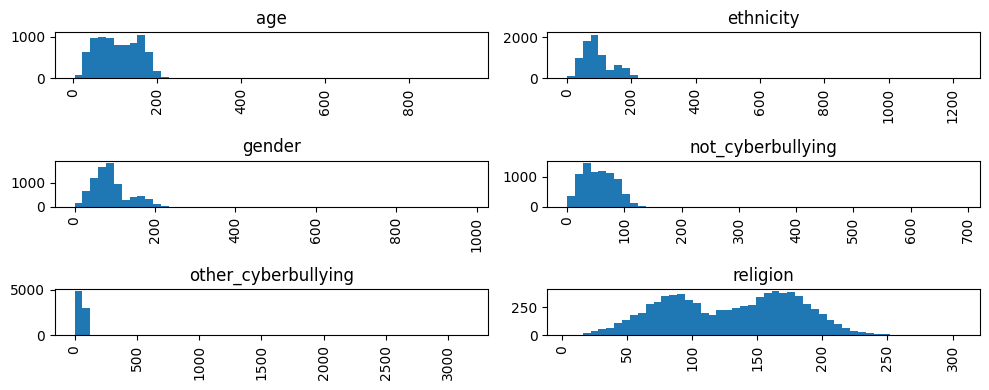

In [114]:
data.hist(column='length', by='cyberbullying_type', bins=50,figsize=(10,4))
plt.tight_layout()

In [115]:
data.tail()

,tweet_text,cyberbullying_type,length
47686,black ppl arent expected anything depended any...,ethnicity,152
47687,turner withhold disappointment turner called c...,ethnicity,203
47688,swear god dumb nigger bitch got bleach hair re...,ethnicity,73
47689,yea fuck rt therealexel youre nigger fucking u...,ethnicity,73
47690,bro u got ta chill rt chillshrammy dog fuck kp...,ethnicity,69


Naive Bayes Model


In [135]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB


In [136]:
# Split the data into train and test sets
X = data['tweet_text']
y = data['cyberbullying_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [138]:
data.isnull().sum()

tweet_text            0
cyberbullying_type    0
length                0
dtype: int64

In [139]:
# Train the model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [143]:
# Evaluate the model
accuracy = model.score(X_test_tfidf, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7516511164692316


KNN Model

In [144]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [145]:

# Split the data into features and target variable
X = data['tweet_text']
y = data['cyberbullying_type']



In [146]:
# Create a TF-IDF vectorizer to convert text into a matrix of TF-IDF features
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)



In [147]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)



In [148]:
# Train a KNN classifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)


KNeighborsClassifier()

In [149]:
# Predict the labels for the test set
y_pred = clf.predict(X_test)


In [150]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.2456232309466401


Random forest Model


In [151]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [152]:
# Split the data into features and target variable
X = data['tweet_text']
y = data['cyberbullying_type']

In [153]:
# Create a TF-IDF vectorizer to convert text into a matrix of TF-IDF features
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

In [154]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [155]:
# Train a Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [156]:
# Predict the labels for the test set
y_pred = clf.predict(X_test)


In [157]:

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.816961945696614


## LTSM MODEL

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [14]:
# Load the dataset
data= pd.read_csv('cyberbullying_tweets.csv',encoding='latin-1')

In [15]:
# Split the data into features and target variable
X = data['tweet_text']
y = data['cyberbullying_type']

In [16]:
# Label encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train.values)
X_train_seq = tokenizer.texts_to_sequences(X_train.values)
X_test_seq = tokenizer.texts_to_sequences(X_test.values)

In [19]:
# Pad sequences to the same length
max_seq_length = max(max(len(seq) for seq in X_train_seq), max(len(seq) for seq in X_test_seq))
X_train_padded = pad_sequences(X_train_seq, maxlen=max_seq_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_seq_length)


In [23]:
# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_seq_length))
model.add(LSTM(128))
model.add(Dense(np.unique(y).shape[0], activation='softmax'))

In [21]:
# Compile and train the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_data=(X_test_padded, y_test))

Epoch 1/10
1193/1193 [==============================] - 1218s 1s/step - loss: 0.5808 - accuracy: 0.7596 - val_loss: 0.4158 - val_accuracy: 0.8287
Epoch 2/10
1193/1193 [==============================] - 1214s 1s/step - loss: 0.2928 - accuracy: 0.8841 - val_loss: 0.4451 - val_accuracy: 0.8299
Epoch 3/10
1193/1193 [==============================] - 1213s 1s/step - loss: 0.1870 - accuracy: 0.9251 - val_loss: 0.5004 - val_accuracy: 0.8163
Epoch 4/10
1193/1193 [==============================] - 1214s 1s/step - loss: 0.1399 - accuracy: 0.9412 - val_loss: 0.5723 - val_accuracy: 0.8186
Epoch 5/10
1193/1193 [==============================] - 1214s 1s/step - loss: 0.1095 - accuracy: 0.9483 - val_loss: 0.6228 - val_accuracy: 0.8152
Epoch 6/10
1193/1193 [==============================] - 1215s 1s/step - loss: 0.0891 - accuracy: 0.9544 - val_loss: 0.7634 - val_accuracy: 0.8014
Epoch 7/10
1193/1193 [==============================] - 1213s 1s/step - loss: 0.0755 - accuracy: 0.9581 - val_loss: 0.8108 -

In [26]:
# Evaluate the model
y_pred_prob = model.predict(X_test_padded)
y_pred = np.argmax(y_pred_prob, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

299/299 [==============================] - 75s 250ms/step
Accuracy: 0.15452353496173604


Logistic Regression

In [158]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [159]:
# Split the data into train and test sets
X = data['tweet_text']
y = data['cyberbullying_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [161]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [162]:
# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

In [163]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8229374148233567
